# Xarray Overview
This is an overview of xarray! I would **highly suggest** checking out the [Project Pythia](https://foundations.projectpythia.org/core/xarray.html) content too!

In [48]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime

## Opening a dataset

In [2]:
ds = xr.open_dataset('mrg10_P3_20181003_R5.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:                                     (time: 3019, bound: 2,
                                                 nephelometerwavelength: 3,
                                                 PSAPwavelength: 3,
                                                 SP2sizebin: 199,
                                                 GITUHSASdiameter: 99,
                                                 AODwavelength: 24,
                                                 ...
                                                 PDIdiameter: 128,
                                                 CASdiameter: 30,
                                                 CDPdiameter: 30,
                                                 SPP200diameter: 30,
                                                 UHSASsizebins: 99,
                                                 APSsizebins: 51, P3_module: 9)
Coordinates:
  * time                                        (time) datetime64[ns] 2018-10...
  * nephelometerwavelength                      (nephelometerwavelength) float64 ...
  * PSAPwavelength                              (PSAPwavelength) float64 470....
  * SP2sizebin                                  (SP2sizebin) float64 9.969e+3...
  * GITUHSASdiameter                            (GITUHSASdiameter) float64 9....
  * AODwavelength                               (AODwavelength) float64 355.0...
  * SSFRwavelength                              (SSFRwavelength) float64 415....
  * PDIdiameter                                 (PDIdiameter) float64 9.969e+...
  * CASdiameter                                 (CASdiameter) float64 0.575 ....
  * CDPdiameter                                 (CDPdiameter) float64 9.969e+...
  * SPP200diameter                              (SPP200diameter) float64 9.96...
Dimensions without coordinates: bound, UHSASsizebins, APSsizebins, P3_module
Data variables: (12/350)
    time_bounds                                 (time, bound) datetime64[ns] ...
    Day_Of_Year                                 (time) float64 ...
    Latitude                                    (time) float64 ...
    Longitude                                   (time) float64 ...
    GPS_Altitude                                (time) float64 ...
    Pressure_Altitude                           (time) float64 ...
    ...                                          ...
    P3_module_occurrence                        (time, P3_module) uint32 ...
    Lambda_Spec_AAng470_530_660_Front           (time) float64 ...
    Lambda_Avg_AAng470_530_660_Front            (time) float64 ...
    Lambda_Spec_AAng470_530_660_Rear            (time) float64 ...
    Lambda_Avg_AAng470_530_660_Rear             (time) float64 ...
    flag_acaod_float                            (time) float64 ...
Attributes: (12/28)
    header_Hskping_P3_20181003_R2_ict:             76,1001\nProject Office\nN...
    header_WINDS_P3_20181003_R2_ict:               51,1001\nThornhill, Lee\nN...
    header_COMA_P3_20181003_R1_ict:                42,1001\nPodolske, James\n...
    header_Ozone_P3_20181003_R1_ict:               40,1001\nPodolske, James\n...
    header_DOEPTI_P3_20181003_R0_ict:              38, 1001\nSedlacek, A. J\n...
    header_SCAT_P3_20181003_R1_ict:                103, 1001\nHowell, S and F...
    ...                                            ...
    header_RSP1-WTRCLD_P3_20181003_R0_ict:          47 , 1001\nCairns, Brian\...
    header_RSP1-NeuralNetwork_P3_20181003_R0_ict:  43, 1001\nKnobelspiesse, K...
    header_WISPER_P3_20181003_R2_ict:              86, 1001\nDavid Noone\nOre...
    history:                                       2021-03-04 10:43:53 Assemb...
    source:                                        c:\data\mrg10time_P3_20181...
    header_Model-age_P3_20181003_R0_ict:           45,1001\nHowes, C and Said...

### Subsetting variables
You can take a **data array** which is a single variable using a single square bracket, whereas if you want it as a dataset (with coordinates and such, and multiple variables), you would use two brackets

In [6]:
air_temp = ds['Static_Air_Temp']
air_temp

<xarray.DataArray 'Static_Air_Temp' (time: 3019)>
array([27.820312, 27.234375, 26.664062, ...,       nan,       nan,       nan])
Coordinates:
  * time     (time) datetime64[ns] 2018-10-03T06:55:40 ... 2018-10-03T15:18:40
Attributes:
    units:    degrees Celcius
    history:  2021-03-04 10:43:53 Merged using merge
    source:   c:\data\source\AIRHOUSEKEEPING\Hskping_P3_20181003_R2.ict

In [8]:
subset = ds[['Static_Air_Temp']]
subset

<xarray.Dataset>
Dimensions:          (time: 3019)
Coordinates:
  * time             (time) datetime64[ns] 2018-10-03T06:55:40 ... 2018-10-03...
Data variables:
    Static_Air_Temp  (time) float64 27.82 27.23 26.66 26.5 ... nan nan nan nan
Attributes: (12/28)
    header_Hskping_P3_20181003_R2_ict:             76,1001\nProject Office\nN...
    header_WINDS_P3_20181003_R2_ict:               51,1001\nThornhill, Lee\nN...
    header_COMA_P3_20181003_R1_ict:                42,1001\nPodolske, James\n...
    header_Ozone_P3_20181003_R1_ict:               40,1001\nPodolske, James\n...
    header_DOEPTI_P3_20181003_R0_ict:              38, 1001\nSedlacek, A. J\n...
    header_SCAT_P3_20181003_R1_ict:                103, 1001\nHowell, S and F...
    ...                                            ...
    header_RSP1-WTRCLD_P3_20181003_R0_ict:          47 , 1001\nCairns, Brian\...
    header_RSP1-NeuralNetwork_P3_20181003_R0_ict:  43, 1001\nKnobelspiesse, K...
    header_WISPER_P3_20181003_R2_ict:              86, 1001\nDavid Noone\nOre...
    history:                                       2021-03-04 10:43:53 Assemb...
    source:                                        c:\data\mrg10time_P3_20181...
    header_Model-age_P3_20181003_R0_ict:           45,1001\nHowes, C and Said...

In [13]:
subset = ds[['Static_Air_Temp', 'Dew_Point']]
subset

<xarray.Dataset>
Dimensions:          (time: 3019)
Coordinates:
  * time             (time) datetime64[ns] 2018-10-03T06:55:40 ... 2018-10-03...
Data variables:
    Static_Air_Temp  (time) float64 27.82 27.23 26.66 26.5 ... nan nan nan nan
    Dew_Point        (time) float64 22.98 22.76 22.47 22.34 ... nan nan nan nan
Attributes: (12/28)
    header_Hskping_P3_20181003_R2_ict:             76,1001\nProject Office\nN...
    header_WINDS_P3_20181003_R2_ict:               51,1001\nThornhill, Lee\nN...
    header_COMA_P3_20181003_R1_ict:                42,1001\nPodolske, James\n...
    header_Ozone_P3_20181003_R1_ict:               40,1001\nPodolske, James\n...
    header_DOEPTI_P3_20181003_R0_ict:              38, 1001\nSedlacek, A. J\n...
    header_SCAT_P3_20181003_R1_ict:                103, 1001\nHowell, S and F...
    ...                                            ...
    header_RSP1-WTRCLD_P3_20181003_R0_ict:          47 , 1001\nCairns, Brian\...
    header_RSP1-NeuralNetwork_P3_20181003_R0_ict:  43, 1001\nKnobelspiesse, K...
    header_WISPER_P3_20181003_R2_ict:              86, 1001\nDavid Noone\nOre...
    history:                                       2021-03-04 10:43:53 Assemb...
    source:                                        c:\data\mrg10time_P3_20181...
    header_Model-age_P3_20181003_R0_ict:           45,1001\nHowes, C and Said...

## Subsetting

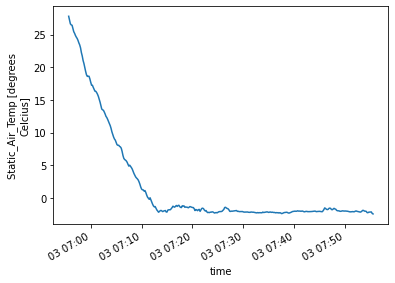

In [21]:
first_360_times = subset.isel(time=range(360))
first_360_times.Static_Air_Temp.plot()

In [27]:
subset.time

<xarray.DataArray 'time' (time: 3019)>
array(['2018-10-03T06:55:40.000000000', '2018-10-03T06:55:50.000000000',
       '2018-10-03T06:56:00.000000000', ..., '2018-10-03T15:18:20.000000000',
       '2018-10-03T15:18:30.000000000', '2018-10-03T15:18:40.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-10-03T06:55:40 ... 2018-10-03T15:18:40
Attributes:
    bounds:   time_bounds
    history:  2019-12-18 15:38:41 Merged using ORACLESmerge\n2021-03-04 10:43...
    source:   c:\data\source\AIRHOUSEKEEPING\Hskping_P3_20181003_R0.ict\nc:\d...

In [31]:
start_time = datetime(2018, 10, 3, 12)
end_time = datetime(2018, 10, 3, 13)

subset.sel(time=slice(start_time, end_time)).time

<xarray.DataArray 'time' (time: 361)>
array(['2018-10-03T12:00:00.000000000', '2018-10-03T12:00:10.000000000',
       '2018-10-03T12:00:20.000000000', ..., '2018-10-03T12:59:40.000000000',
       '2018-10-03T12:59:50.000000000', '2018-10-03T13:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-10-03T12:00:00 ... 2018-10-03T13:00:00
Attributes:
    bounds:   time_bounds
    history:  2019-12-18 15:38:41 Merged using ORACLESmerge\n2021-03-04 10:43...
    source:   c:\data\source\AIRHOUSEKEEPING\Hskping_P3_20181003_R0.ict\nc:\d...

### Using Groupby

In [35]:
hourly_max = subset.groupby('time.hour').max()
hourly_max

<xarray.Dataset>
Dimensions:          (hour: 10)
Coordinates:
  * hour             (hour) int64 6 7 8 9 10 11 12 13 14 15
Data variables:
    Static_Air_Temp  (hour) float64 27.82 17.71 -2.547 ... 23.27 24.62 31.66
    Dew_Point        (hour) float64 22.98 16.69 -19.61 ... 20.77 22.46 23.45

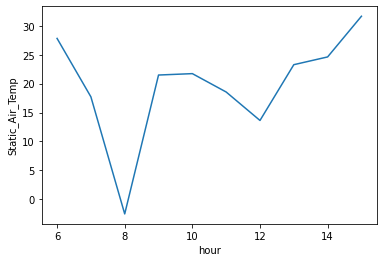

In [49]:
hourly_max.Static_Air_Temp.plot()